In [2]:
import pandas as pd
from rdkit import Chem
import networkx as nx
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.error')

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F

import torch.nn as nn
import torch.nn.functional as F

In [4]:
ddi_fp = 'drugbank.tab'
ddi = pd.read_csv(ddi_fp, sep='\t')
def valid_smiles(smiles): 
    if not isinstance(smiles, str): 
        return False
    return Chem.MolFromSmiles(smiles) is not None

invalid_rows = ddi[~(ddi['X1'].apply(valid_smiles) & ddi['X2'].apply(valid_smiles))]
ddi_cleaned = ddi.drop(invalid_rows.index).reset_index(drop = True)


In [5]:
smile = ddi_cleaned['X1'][92]

In [6]:
smile

'CN1[C@H]2CC[C@@H]1C[C@@H](C2)OC(=O)[C@H](CO)C1=CC=CC=C1'

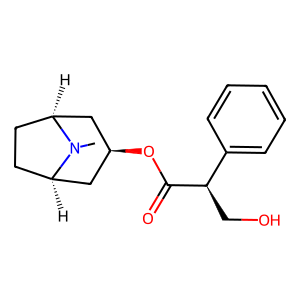

In [8]:
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles(smile)
img = Draw.MolToImage(mol)
img

In [9]:
from torch_geometric.utils import from_smiles

g = from_smiles(smile, with_hydrogen = False)
g


Data(x=[21, 9], edge_index=[2, 46], edge_attr=[46, 3], smiles='CN1[C@H]2CC[C@@H]1C[C@@H](C2)OC(=O)[C@H](CO)C1=CC=CC=C1')

In [15]:
# x is node feature matrix 21 atoms, 9 features/attributes
g.x

21

In [16]:
# 9 features utilized

g.num_node_features

9

In [17]:
# 2 tensors (undirected graph) into number of bonds
g.edge_index

tensor([[ 0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,
          7,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 12, 13, 13, 14, 15, 15, 15,
         16, 16, 17, 17, 18, 18, 19, 19, 20, 20],
        [ 1,  0,  2,  5,  1,  3,  8,  2,  4,  3,  5,  1,  4,  6,  5,  7,  6,  8,
          9,  2,  7,  7, 10,  9, 11, 12, 10, 10, 13, 15, 12, 14, 13, 12, 16, 20,
         15, 17, 16, 18, 17, 19, 18, 20, 15, 19]])

In [18]:
g.edge_attr

tensor([[ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  1],
        [ 1,  0,  1],
        [ 2,  0,  1],
        [ 1,  0,  0],
        [ 2,  0,  1],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [1

In [23]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_networkx
from torch_geometric.nn import AttentiveFP


In [24]:
# convert torch_geometric data to networkx graph
G = to_networkx(g)

In [26]:
G.number_of_nodes()

21

In [27]:
G.number_of_edges()

46

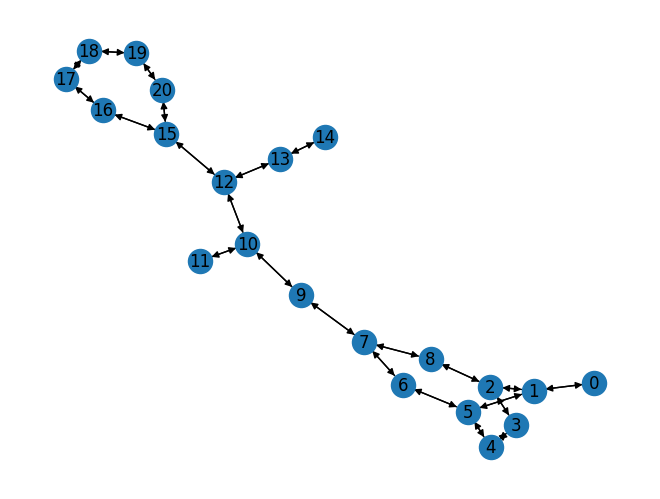

In [34]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels = True)